#CHAPTER 9 Plotting and Visualization

##A Brief matplotlib API Primer

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
import matplotlib.pyplot as plt

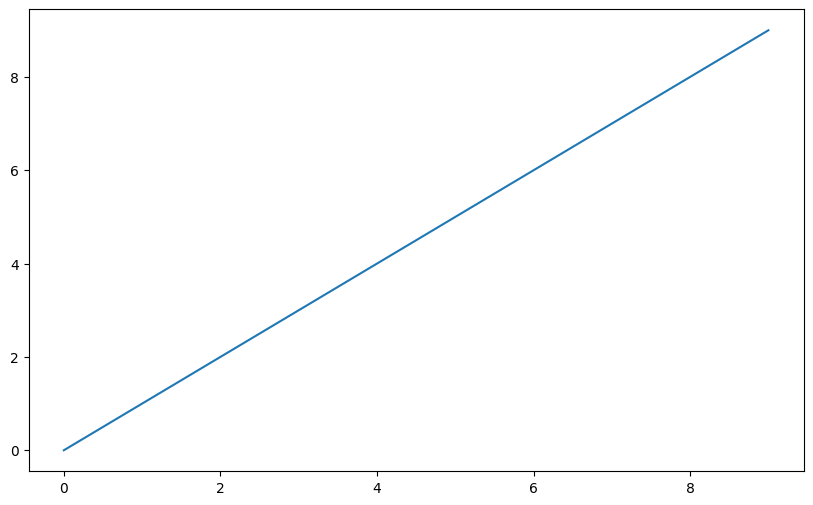

In [3]:
data = np.arange(10)
data
plt.plot(data)

###Figures and Subplots

In [4]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [7]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

In [8]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

In [9]:
plt.close("all")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

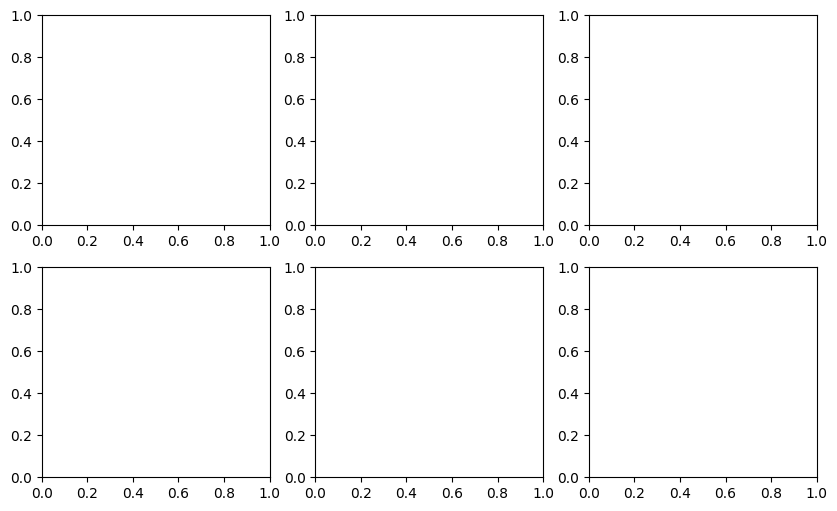

In [10]:
fig, axes = plt.subplots(2, 3)
axes

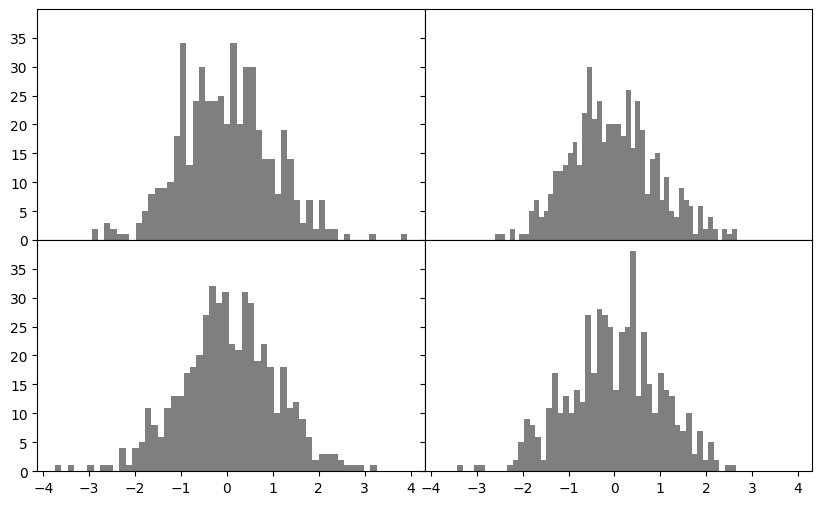

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

###Colors, Markers, and Line Styles

In [12]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [13]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

In [14]:
plt.close("all")

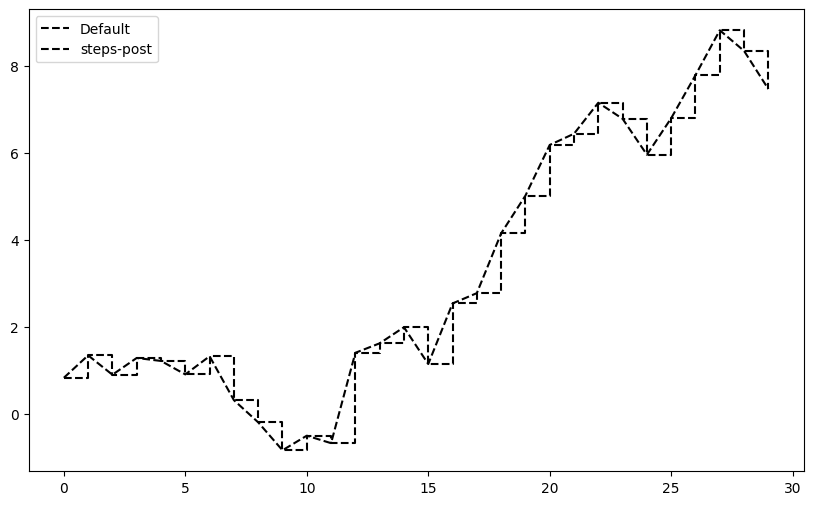

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");
ax.legend()

###Ticks, Labels, and Legends

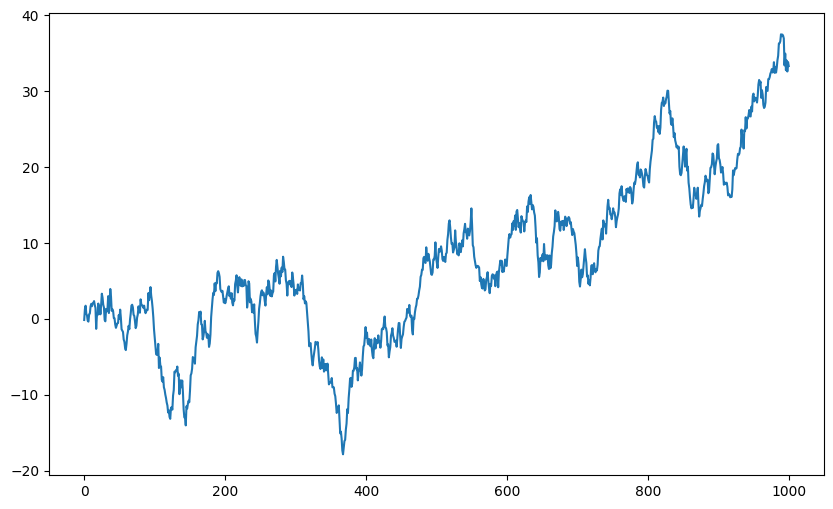

In [16]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

In [17]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

In [18]:
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

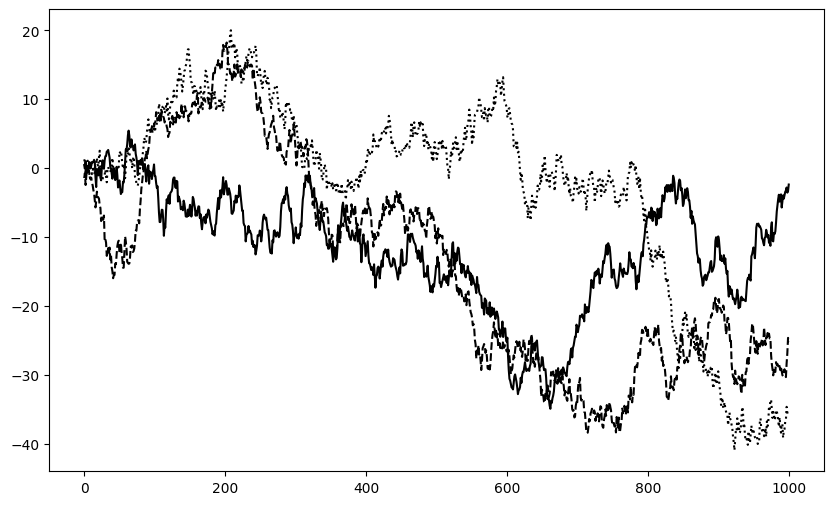

In [19]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label="two");
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");

###Annotations and Drawing on a Subplot

In [20]:
ax.legend()

In [22]:
ax.set_title("Important dates in the 2008–2009 financial crisis")

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

In [ ]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

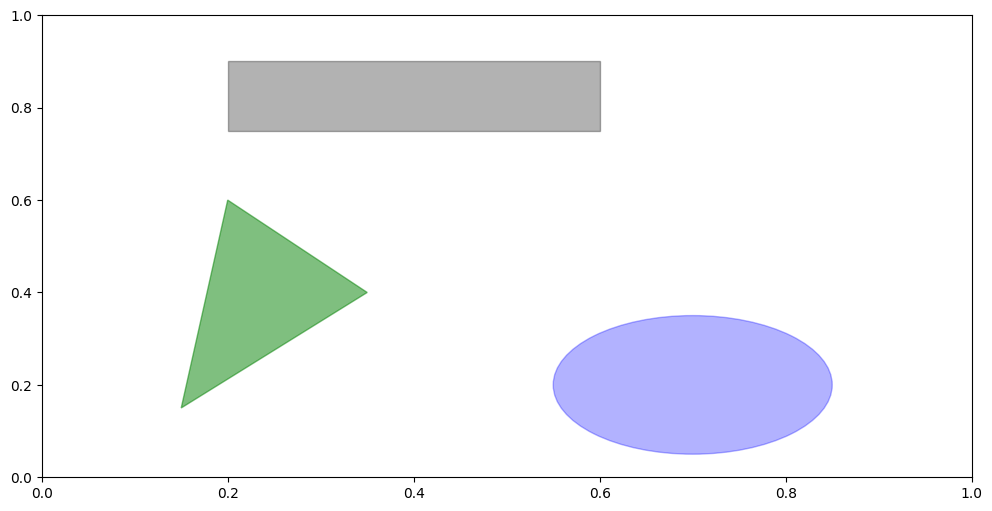

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

###Saving Plots to File

In [24]:
plt.close("all")

###matplotlib Configuration

##Plotting with pandas and seaborn

###Line Plots

<Axes: >

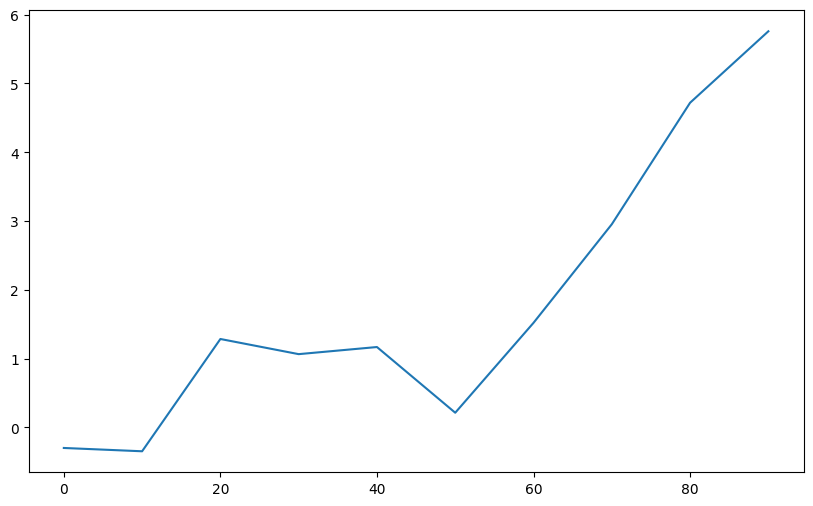

In [26]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

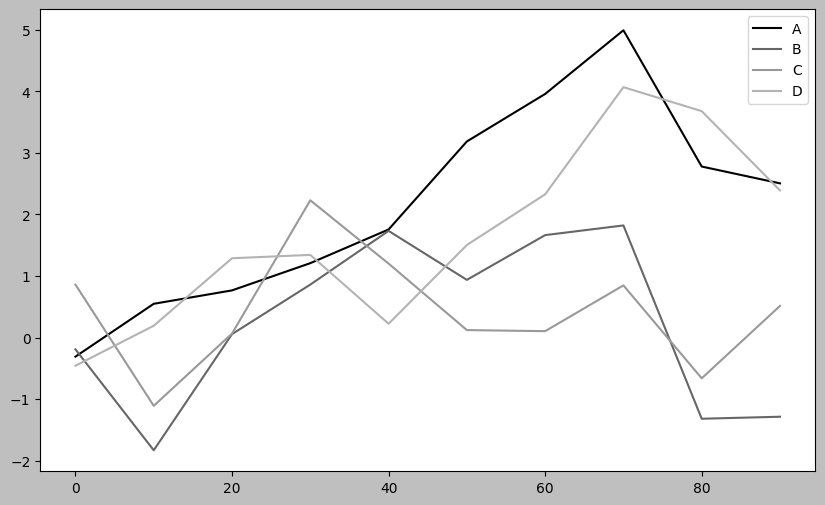

In [27]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

###Bar Plots

<Axes: >

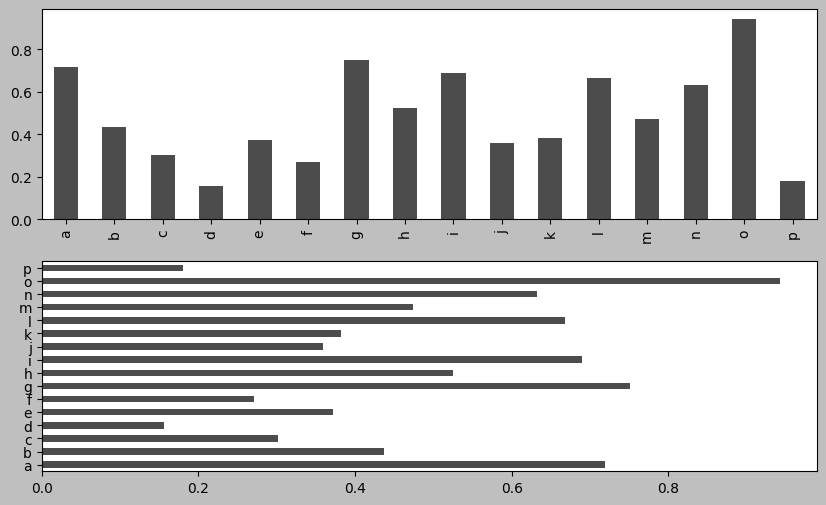

In [28]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [29]:
np.random.seed(12348)

<Axes: >

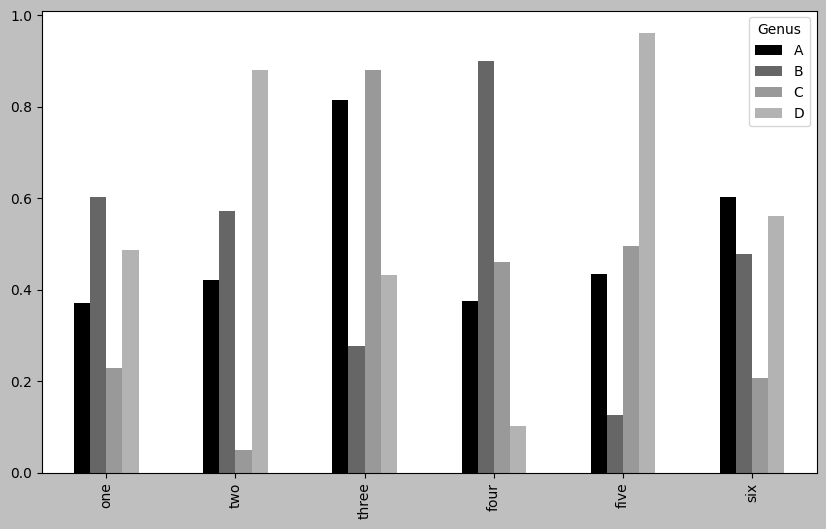

In [30]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

In [31]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

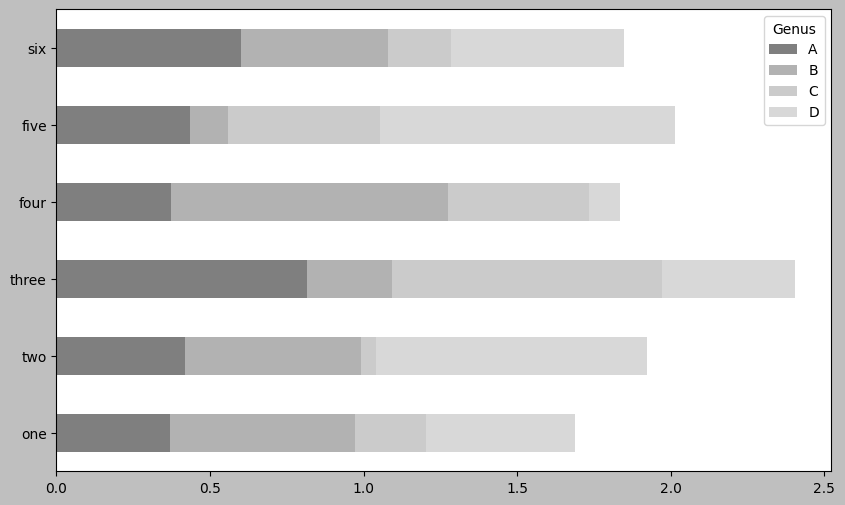

In [32]:
df.plot.barh(stacked=True, alpha=0.5)

In [33]:
plt.close("all")

In [ ]:
tips = pd.read_csv("examples/tips.csv")
tips.head()
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

In [ ]:
party_counts = party_counts.loc[:, 2:5]

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts
party_pcts.plot.bar(stacked=True)

In [37]:
plt.close("all")

In [ ]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

In [39]:
plt.close("all")

In [ ]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [41]:
plt.close("all")

In [42]:
sns.set_style("whitegrid")

In [43]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
tips["tip_pct"].plot.hist(bins=50)

In [45]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
tips["tip_pct"].plot.density()

In [47]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

###Histograms and Density Plots

<Axes: ylabel='Count'>

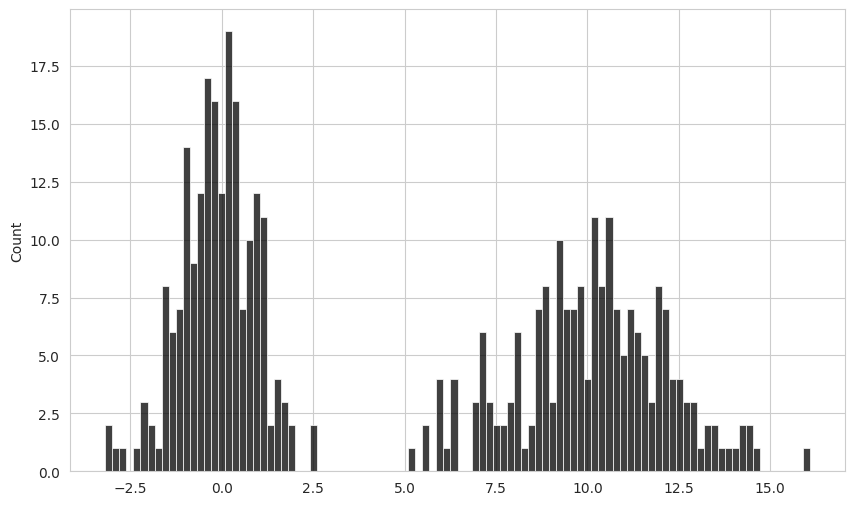

In [48]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

In [ ]:
macro = pd.read_csv("examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

###Scatter or Point Plots

In [50]:

plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

In [ ]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

In [ ]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

In [ ]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

In [57]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

NameError: name 'tips' is not defined

In [56]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

#Kết thúc